In [53]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [59]:
data = pd.read_csv('Training_Dataset_1.csv')
data.head()

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,FIT602.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,2024-04-23 09:15:00,1,548.8321,0.0,1,1,1,1,0.0,230.197388,...,1.017204,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
1,2024-04-23 09:15:01,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.005511,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
2,2024-04-23 09:15:02,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.005511,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
3,2024-04-23 09:15:03,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.013200,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active
4,2024-04-23 09:15:04,1,548.8321,0.0,1,1,1,1,0.0,230.005127,...,1.009515,1,1,1,Inactive,Inactive,Active,Inactive,Inactive,Active


In [60]:
data.drop(columns=['t_stamp'],axis=0)
data.info()

KeyError: "['t_stamp'] not found in axis"

# Observations 
* From my observation, all the columns with float64 datatype have a scalar value and these need to be scaled in the range (0,1). 
* All the int64 values are categorical some ranging from (0,5)
* We need to encode them so as to use for training. 
* All the columns which has *.Alarm can be considered as the output variables. We probably need to categorize them into 0,1.
* For more understanding on the data, we need to correlation plots between the int, float columns with the Alarm columns. 
 

In [ ]:
int_df = data.select_dtypes(include='int64')
print(int_df.columns)
float_df = data.select_dtypes(include='float64')
print(float_df.columns)
alarm = data.select_dtypes(include='object')
print(alarm.columns)

Index(['P1_STATE', 'MV101.Status', 'P101.Status', 'P102.Status', 'P2_STATE',
       'MV201.Status', 'P201.Status', 'P202.Status', 'P203.Status',
       'P204.Status', 'P205.Status', 'P206.Status', 'P207.Status',
       'P208.Status', 'P3_STATE', 'MV301.Status', 'MV302.Status',
       'MV303.Status', 'MV304.Status', 'P301.Status', 'P302.Status',
       'P4_STATE', 'AIT401.Pv', 'P401.Status', 'P402.Status', 'P403.Status',
       'P404.Status', 'UV401.Status', 'P5_STATE', 'P501.Status', 'P501.Speed',
       'P502.Status', 'P502.Speed', 'MV501.Status', 'MV502.Status',
       'MV503.Status', 'MV504.Status', 'P6_STATE', 'P601.Status',
       'P602.Status', 'P603.Status'],
      dtype='object')
Index(['LIT101.Pv', 'FIT101.Pv', 'FIT201.Pv', 'AIT201.Pv', 'AIT202.Pv',
       'AIT203.Pv', 'AIT301.Pv', 'AIT302.Pv', 'AIT303.Pv', 'LIT301.Pv',
       'FIT301.Pv', 'DPIT301.Pv', 'LIT401.Pv', 'FIT401.Pv', 'AIT402.Pv',
       'FIT501.Pv', 'FIT502.Pv', 'FIT503.Pv', 'FIT504.Pv', 'AIT501.Pv',
       'AIT502

[Text(0, 0.5, 'some label')]

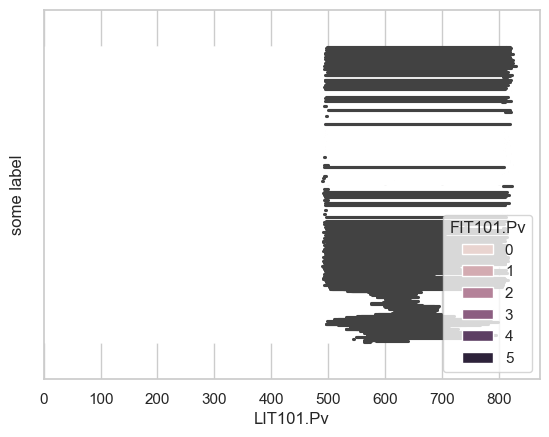

In [36]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=data, x="LIT101.Pv",hue="FIT101.Pv")
ax.set(ylabel="some label")